In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [9]:

# Simulate white noise
def wn_Gaussian(seed: np.ndarray = np.random.seed(29201))->None:
    """_summary_
    This function simulate a white noise time series problem from the 
    Gaussian distribution. For simplicity we assume the standard Gaussian,
    but any variance produces the same results.
    - This sequence is a completly random process. There is no any signficance
    ACF or PACF at any lag.

    Args:
        seed (np.ndarray, optional): _description_. Defaults to np.random.seed(29201).
    """
    # Simulate the white noise sequence (time-series) with length 200.
    seed = seed
    X_t: np.ndarray = np.random.normal(loc=0, scale=1, size=200)

    # Plot white noise
    plt.figure(figsize=(12, 6))
    plt.plot(X_t, label='White Noise')
    plt.title('Simulated White Noise Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Computing and plotting the ACF and PACF for the white noise
    _, ax = plt.subplots(2, 1, figsize=(12, 6))
    sm.graphics.tsa.plot_acf(X_t, lags=30, ax=ax[0])
    sm.graphics.tsa.plot_pacf(X_t, lags=30, ax=ax[1])
    plt.tight_layout()
    plt.show()


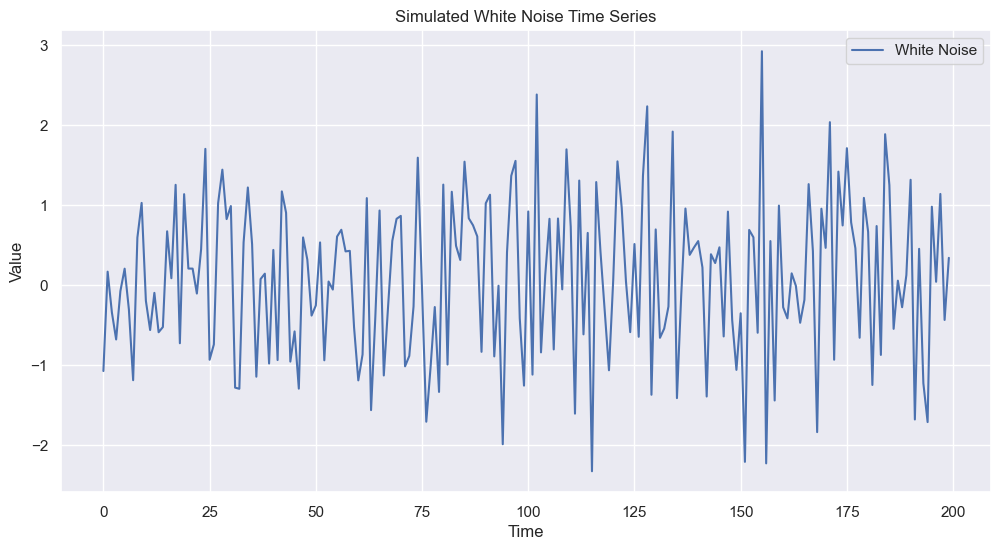

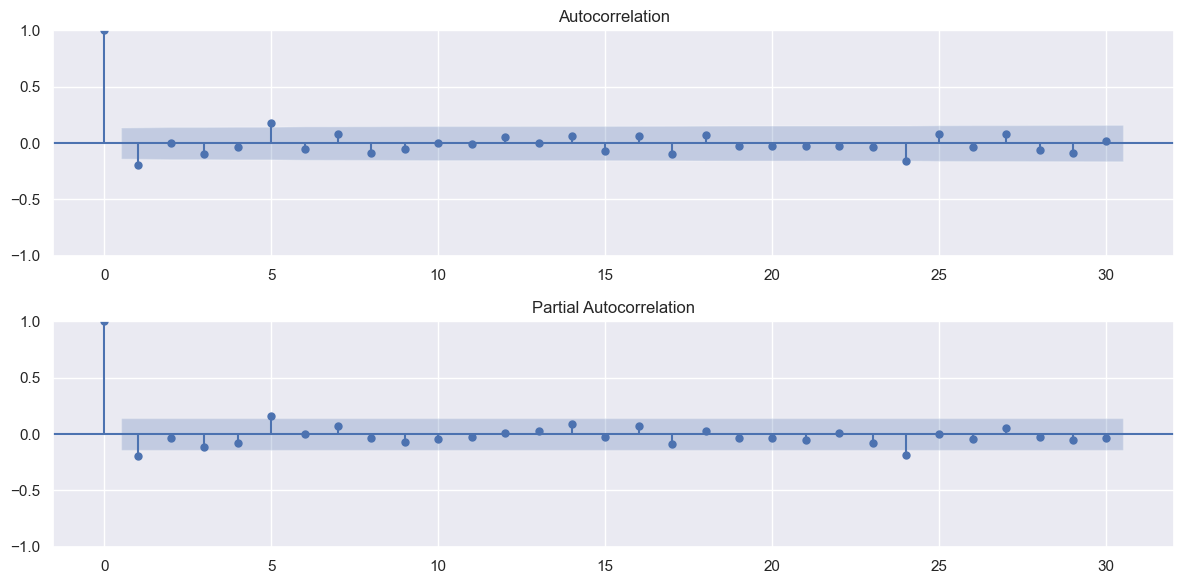

In [10]:
wn_Gaussian()

In [ ]:
def timeSimulaton() -> pd.Series:
    
    """_summary_
    - This  method simulate a non-stationary time series with three
    important components (trend, seasons, and randomness (noise))

    Returns:
        pd.Series: _description_
    """
    t = np.arange(200) # time index
    trend = 0.05 * t # Slope
    seasonality = 2 * np.sin(2 * np.pi * t / 12) # Periods
    noise = np.random.normal(0, 1, 200) # random component

    # Simulated time series
    ts = trend + seasonality + noise # non-stationary ts
    ts_series = pd.Series(ts) 

    # Ploting time series
    plt.figure(figsize=(10, 4))
    plt.plot(ts_series)
    plt.title("Simulated Time Series: Trend + Seasonality + Noise")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

    # Ploting ACF and PACF
    _, ax = plt.subplots(2, 1, figsize=(10, 6))
    sm.graphics.tsa.plot_acf(ts_series, lags=30, ax=ax[0])
    sm.graphics.tsa.plot_pacf(ts_series, lags=30, ax=ax[1])
    plt.tight_layout()
    plt.show()
    
    return ts_series

# Fit AR(1)


if __name__ == "__main__":
    
    X_t = timeSimulaton() # Ploating and fetching the simulated series
    
    model_ar = ARIMA(X_t, order=(8, 0, 0)).fit() # AR(1)
    print(model_ar.summary())

    # Fit MA(1)
    model_ma = ARIMA(X_t, order=(0, 0, 5)).fit()
    print(model_ma.summary())

    # Fit ARMA(1,1)
    model_arma = ARIMA(X_t, order=(8, 0, 5)).fit()
    print(model_arma.summary())

    # Plot residuals
    model_arma.resid.plot(title='ARMA(1,1) Residuals', figsize=(10, 4))
    plt.grid()
    plt.show()


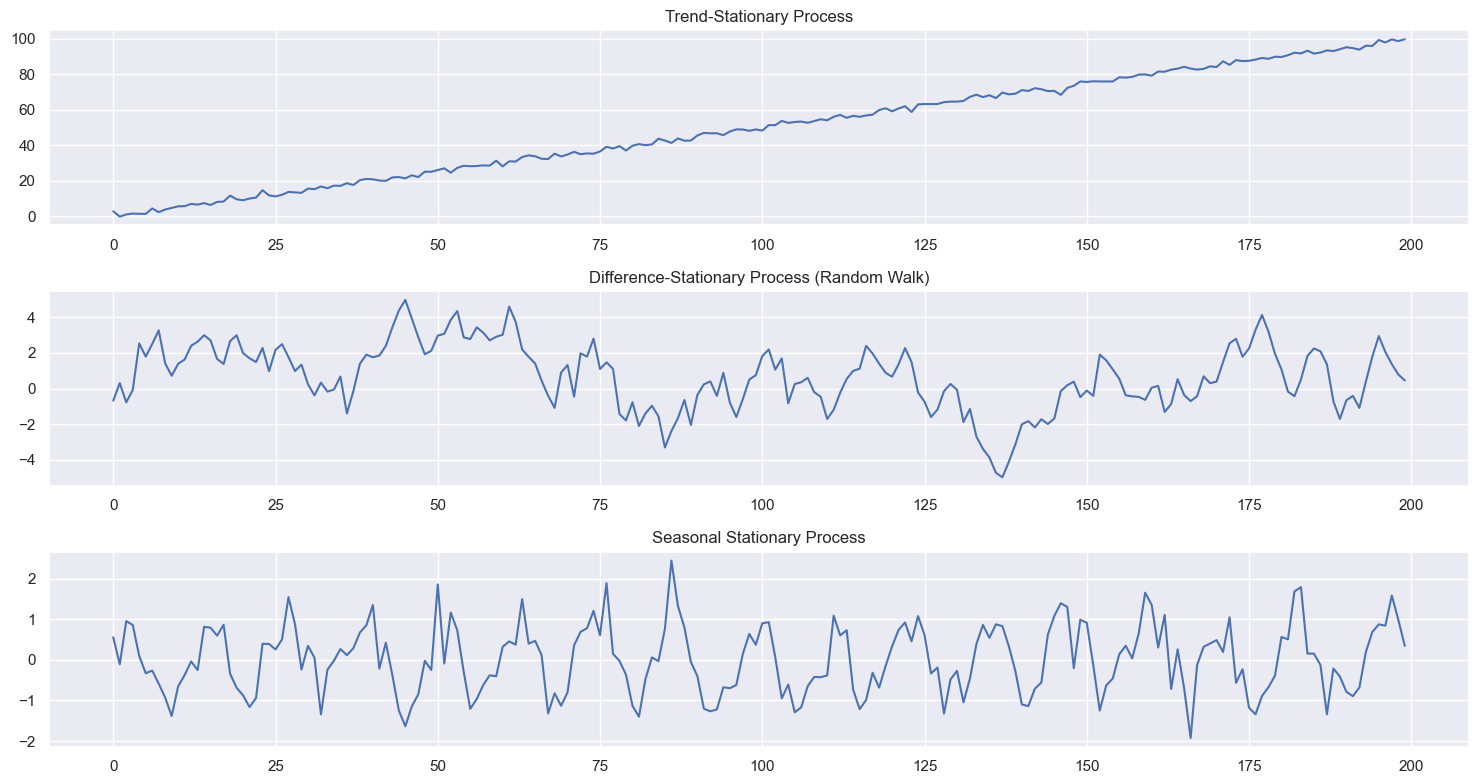


ADF Test - Trend-Stationary
ADF Statistic: -0.0931
p-value: 0.9501
=> Nonstationary

ADF Test - Random Walk
ADF Statistic: -3.8475
p-value: 0.0025
=> Stationary

ADF Test - Seasonal Stationary
ADF Statistic: -3.0172
p-value: 0.0333
=> Stationary


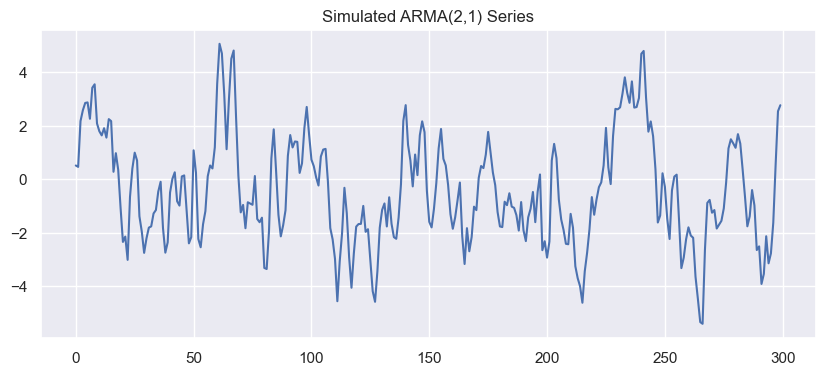

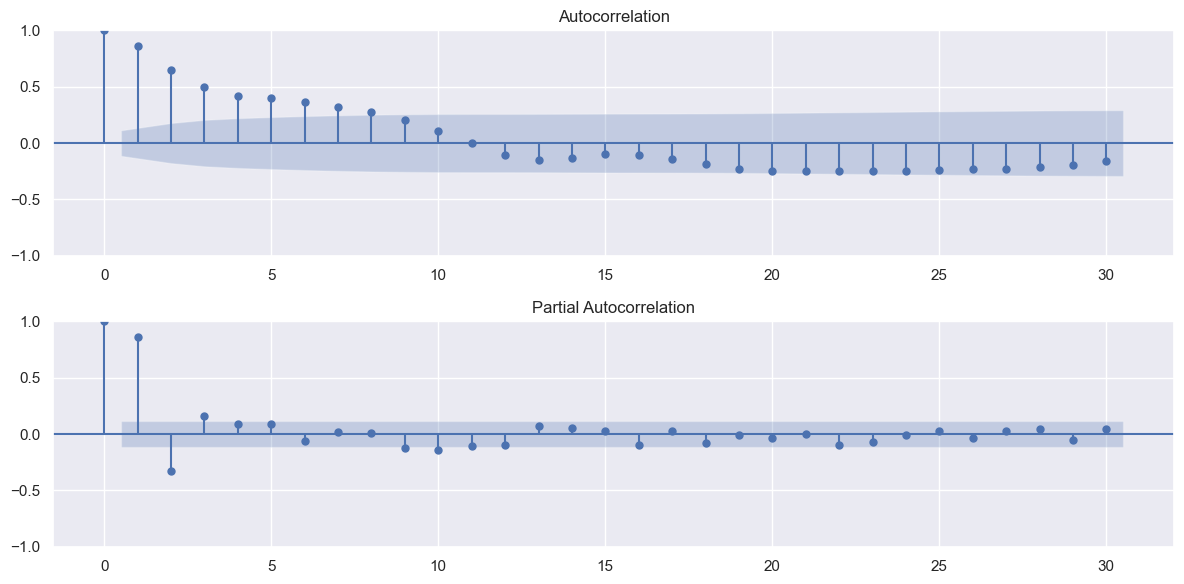


ACF values (first 10 lags):
[1.    0.858 0.649 0.497 0.42  0.397 0.368 0.322 0.275 0.208 0.11 ]

PACF values (first 10 lags):
[ 1.     0.86  -0.335  0.172  0.092  0.092 -0.065  0.02   0.012 -0.13
 -0.15 ]

Fitted ARMA(2,1) model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -412.829
Date:                Thu, 17 Apr 2025   AIC                            835.658
Time:                        11:01:16   BIC                            854.176
Sample:                             0   HQIC                           843.069
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

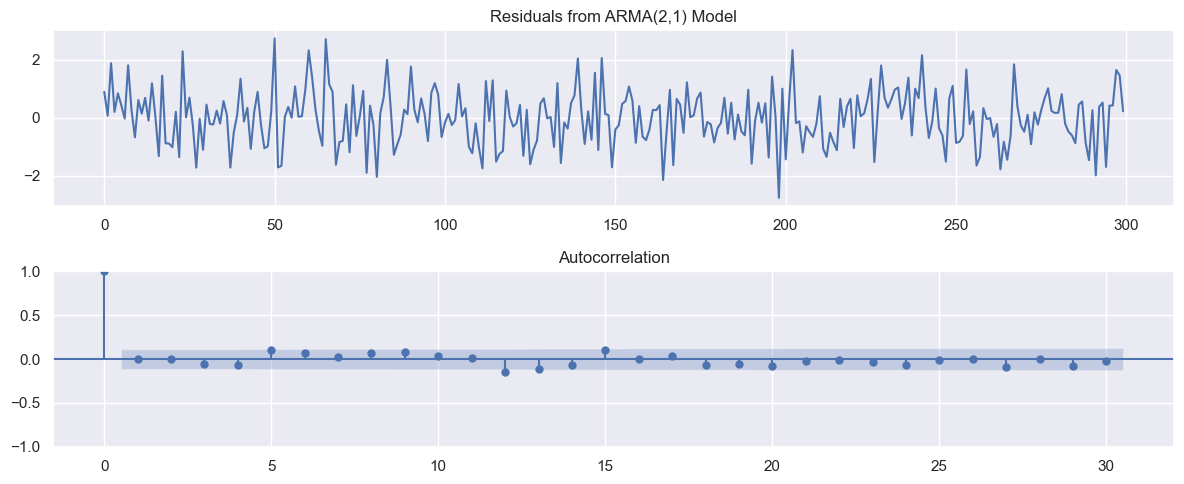

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

sns.set_theme(style="darkgrid")
np.random.seed(12938)
T = 200

# Trend-Stationary Process 
trend = 0.5 * np.arange(T)
stationary_noise = np.random.normal(0, 1, T)
trend_stationary = trend + stationary_noise

# Difference Stationary (Random Walk) 
random_walk = np.cumsum(np.random.normal(0, 1, T))

# Seasonal Stationary 
seasonal_pattern = np.sin(2 * np.pi * np.arange(T) / 12)
seasonal_noise = np.random.normal(0, 0.5, T)
seasonal_stationary = seasonal_pattern + seasonal_noise

# Plot all series 
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_stationary)
plt.title("Trend-Stationary Process")

plt.subplot(3, 1, 2)
plt.plot(random_walk)
plt.title("Difference-Stationary Process (Random Walk)")

plt.subplot(3, 1, 3)
plt.plot(seasonal_stationary)
plt.title("Seasonal Stationary Process")
plt.tight_layout()
plt.show()

#ADF TESTS 
def test_adf(series, name):
    result = adfuller(series)
    print(f"\nADF Test - {name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("=> Stationary" if result[1] < 0.05 else "=> Nonstationary")

test_adf(trend_stationary, "Trend-Stationary")
test_adf(random_walk, "Random Walk")
test_adf(seasonal_stationary, "Seasonal Stationary")

# Simulate ARMA(2,1)
arma_process = ArmaProcess(ar=[1, -0.5, -0.3], ma=[1, 0.7])
arma_data = arma_process.generate_sample(nsample=300)

plt.figure(figsize=(10, 4))
plt.plot(arma_data)
plt.title("Simulated ARMA(2,1) Series")
plt.show()

# ACF/PACF: Visual + Numerical 
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(arma_data, ax=ax[0], lags=30)
plot_pacf(arma_data, ax=ax[1], lags=30)
plt.tight_layout()
plt.show()

# Print first few ACF and PACF values numerically
acf_vals = acf(arma_data, nlags=10)
pacf_vals = pacf(arma_data, nlags=10)
print("\nACF values (first 10 lags):")
print(np.round(acf_vals, 3))
print("\nPACF values (first 10 lags):")
print(np.round(pacf_vals, 3))

# Fit ARMA(p,q) using best guess from PACF/ACF 
model = ARIMA(arma_data, order=(2, 0, 1))
result = model.fit()
print("\nFitted ARMA(2,1) model summary:")
print(result.summary())

# Residuals and diagnostics 
residuals = result.resid
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].plot(residuals)
ax[0].set_title("Residuals from ARMA(2,1) Model")
plot_acf(residuals, ax=ax[1], lags=30)
plt.tight_layout()
plt.show()